In [16]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import mido
import tensorflow as tf
from tensorflow import keras
from sklearn import mixture
print(tf.__version__)

2.0.0-alpha0


In [5]:
# begin by dividing the data into snippets
def extract_snippet(notes, size):
    cut = len(notes)%size
    # cut off values from end of trajectory to match sizes
    if cut > 0:
        notes = notes[:-cut]
    snippets = np.split(notes, len(notes)/size)
    return snippets

size_motif = 5

em_set = []

for i in range(100):
    if i<10:
        traj_e = np.loadtxt("data/e_000{}.txt".format(i))
        traj_g = np.loadtxt("data/g_000{}.txt".format(i))
    else:
        traj_e = np.loadtxt("data/e_00{}.txt".format(i))
        traj_g = np.loadtxt("data/g_00{}.txt".format(i))
        
    snippets_e = extract_snippet(traj_e, size_motif)
    snippets_g = extract_snippet(traj_g, size_motif)
    
    em_set.extend(snippets_e)
    em_set.extend(snippets_g)

em_set = np.array(em_set)
np.shape(em_set)

(19724, 5)

## EM with just the raw trajectory snippet

In [93]:
n_components = 12
cv_type = 'full'
gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
gmm.fit(em_set)
gmm.bic(em_set)

378081.7713633181

<IPython.core.display.Javascript object>


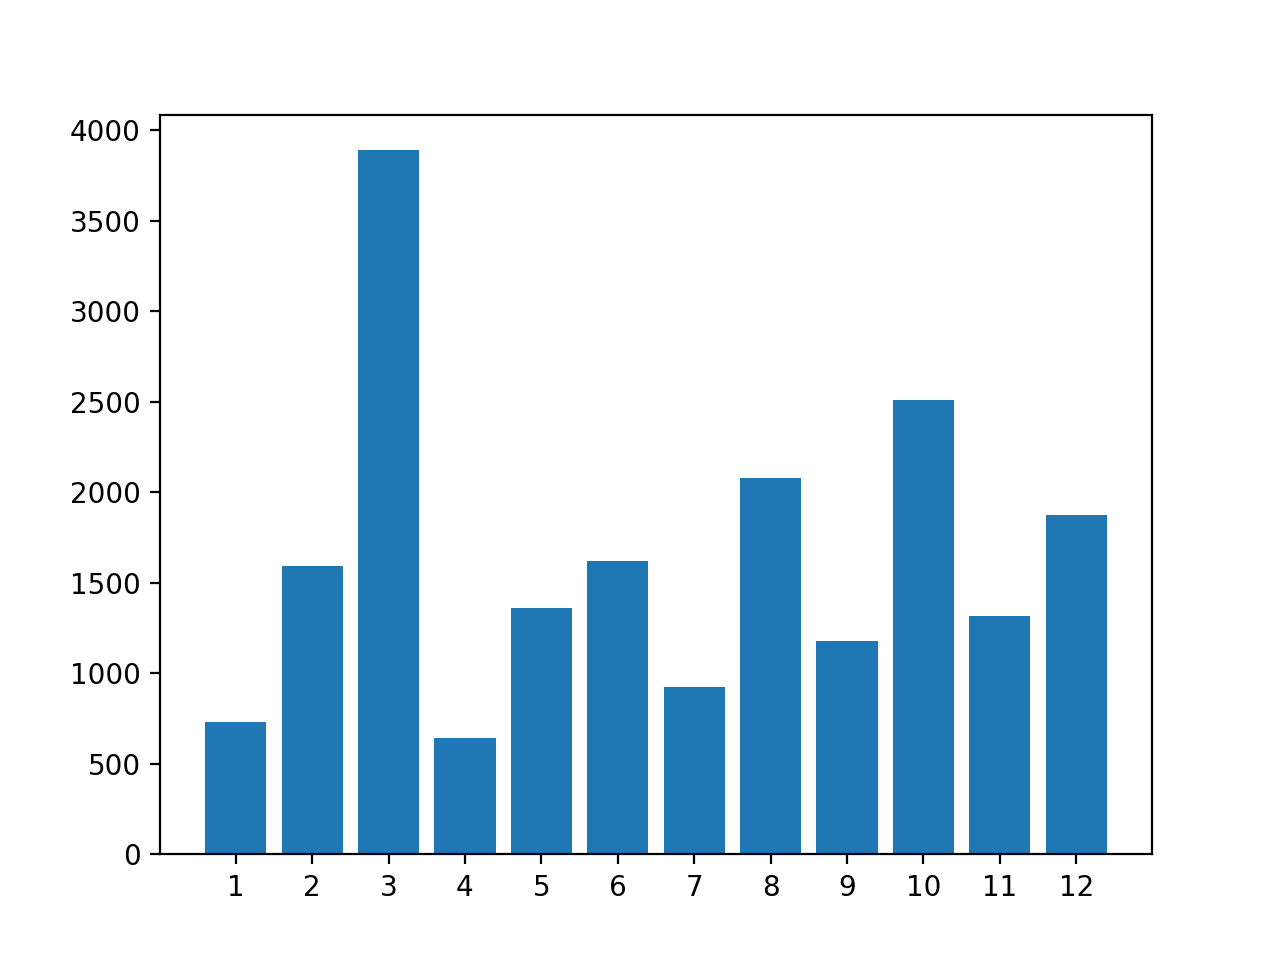

([<matplotlib.axis.XTick at 0x1a362f2828>,
 <a list of 12 Text xticklabel objects>)

In [94]:
labels = gmm.predict(em_set)
population = []

for i in range(12):
    population.append(np.sum(labels==i))

population = np.array(population)

np.shape(population)

ind = np.arange(1, 13)
plt.bar(ind, population)
plt.xticks(ind)

<IPython.core.display.Javascript object>


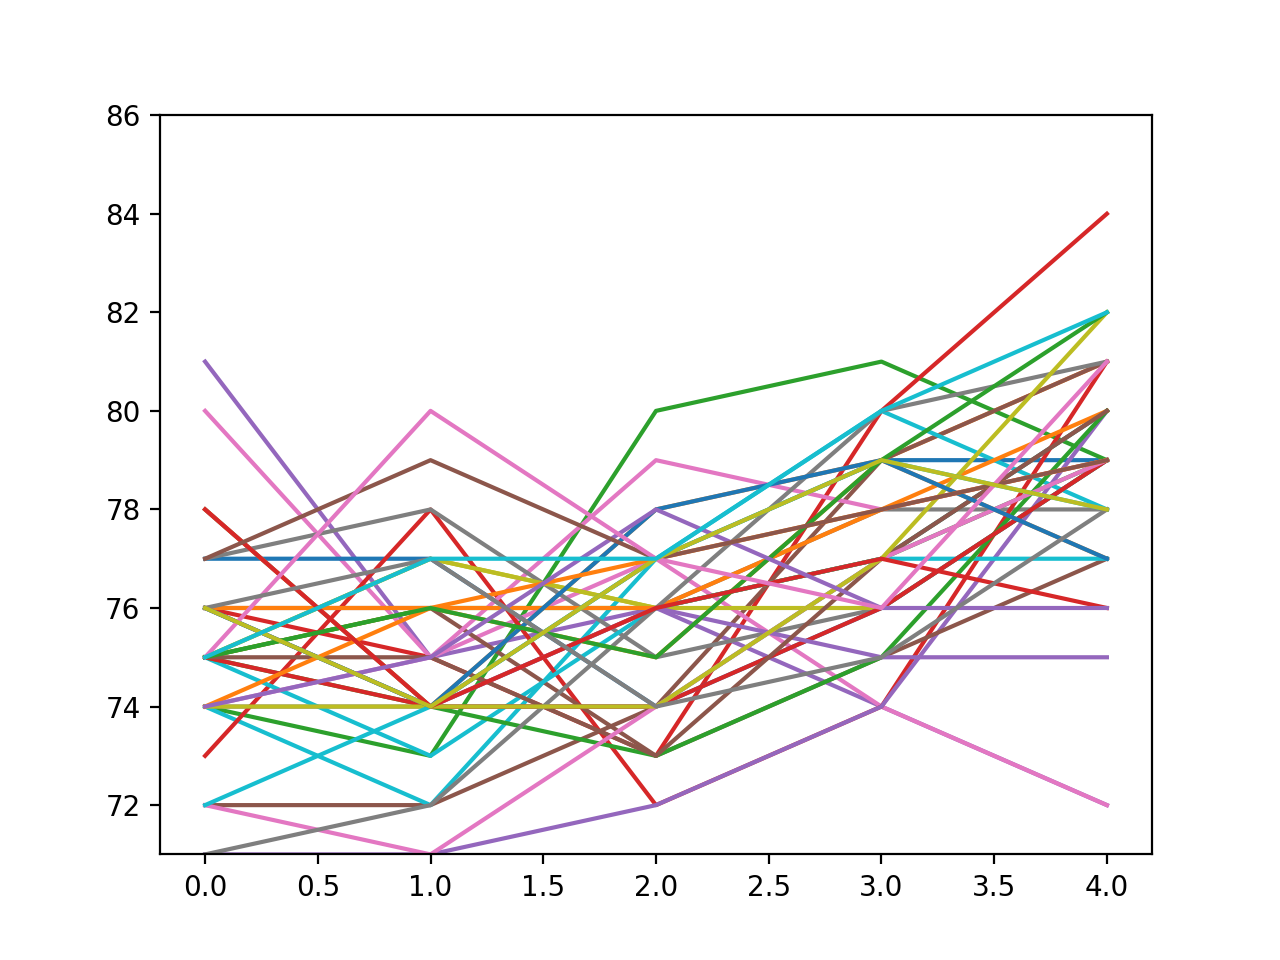

(71, 86)

In [98]:
for i in np.where(labels==6)[0][0:40]:
    plt.plot(em_set[i])
    
plt.ylim(71,86)

## EM with the gradient

In [39]:
em_set_gradient = [np.gradient(item) for item in em_set]
em_set_gradient = np.array(em_set_gradient)
np.shape(em_set_gradient)

(19724, 5)

In [41]:
n_components = 12
cv_type = 'full'
gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
gmm.fit(em_set_gradient)
gmm.bic(em_set_gradient)

33327.82073585305

<IPython.core.display.Javascript object>


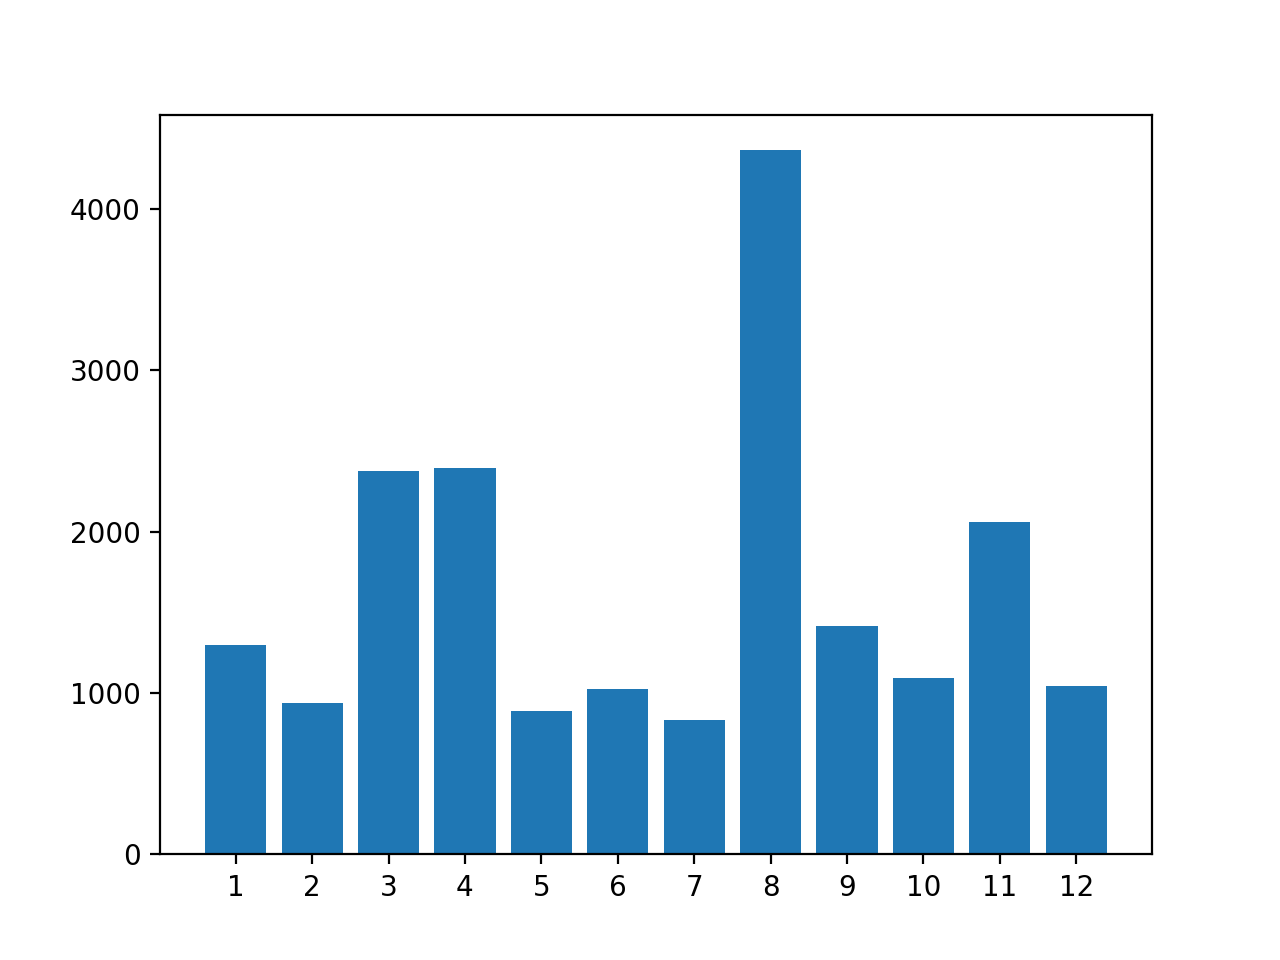

([<matplotlib.axis.XTick at 0x1a37d31ac8>,
 <a list of 12 Text xticklabel objects>)

In [42]:
labels = gmm.predict(em_set_gradient)
population = []

for i in range(12):
    population.append(np.sum(labels==i))

population = np.array(population)

np.shape(population)

ind = np.arange(1, 13)
plt.bar(ind, population)
plt.xticks(ind)

<IPython.core.display.Javascript object>


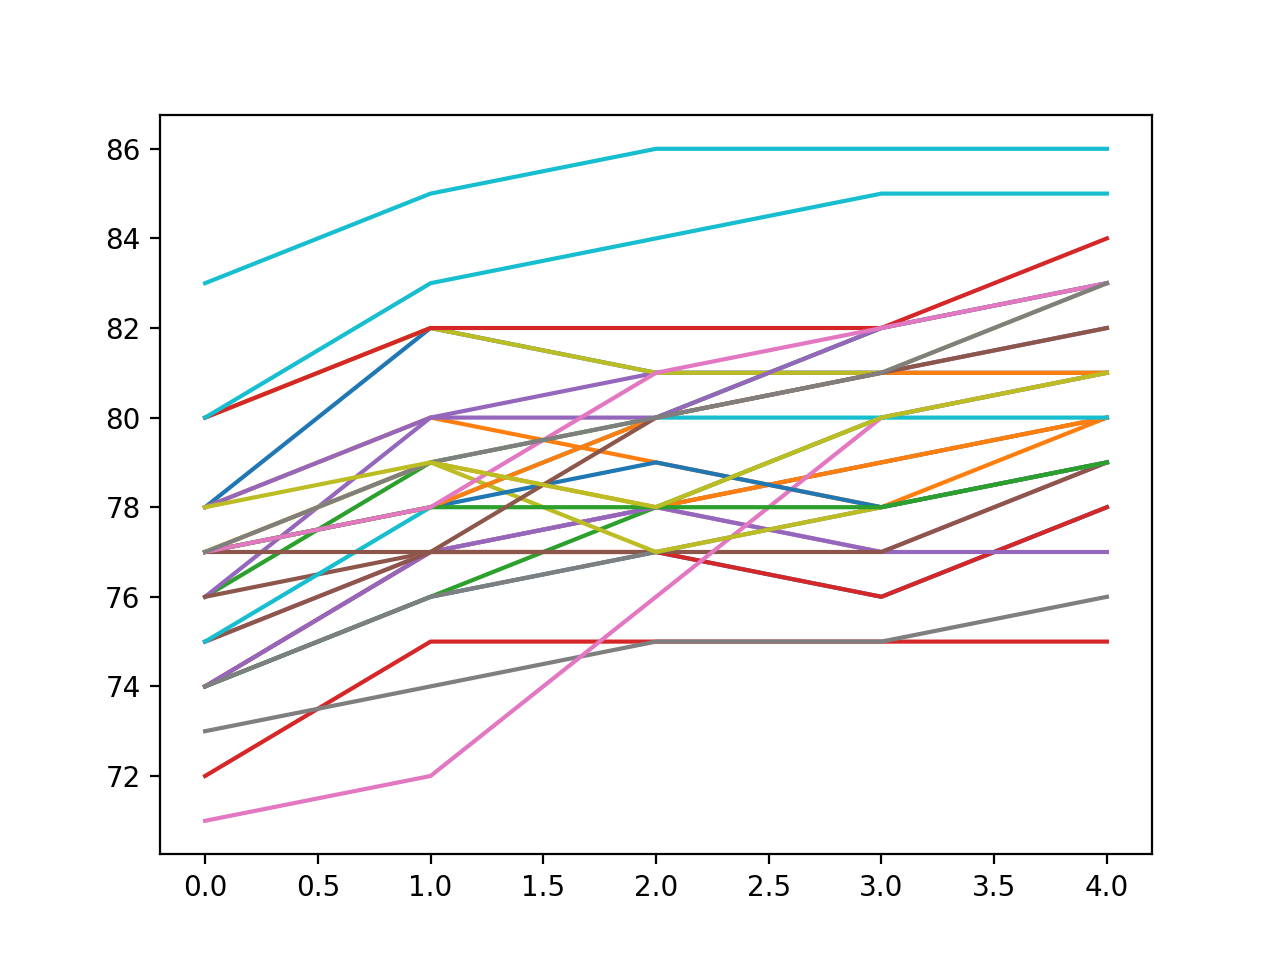

In [46]:
for i in np.where(labels==0)[0][0:30]:
    plt.plot(em_set[i])

## EM with the raw value and the gradient

In [73]:
em_gr_plus_raw = (3*em_set_gradient + 2*em_set)/5
gmm.fit(em_gr_plus_raw)
gmm.bic(em_gr_plus_raw)

227290.82396145363

<IPython.core.display.Javascript object>


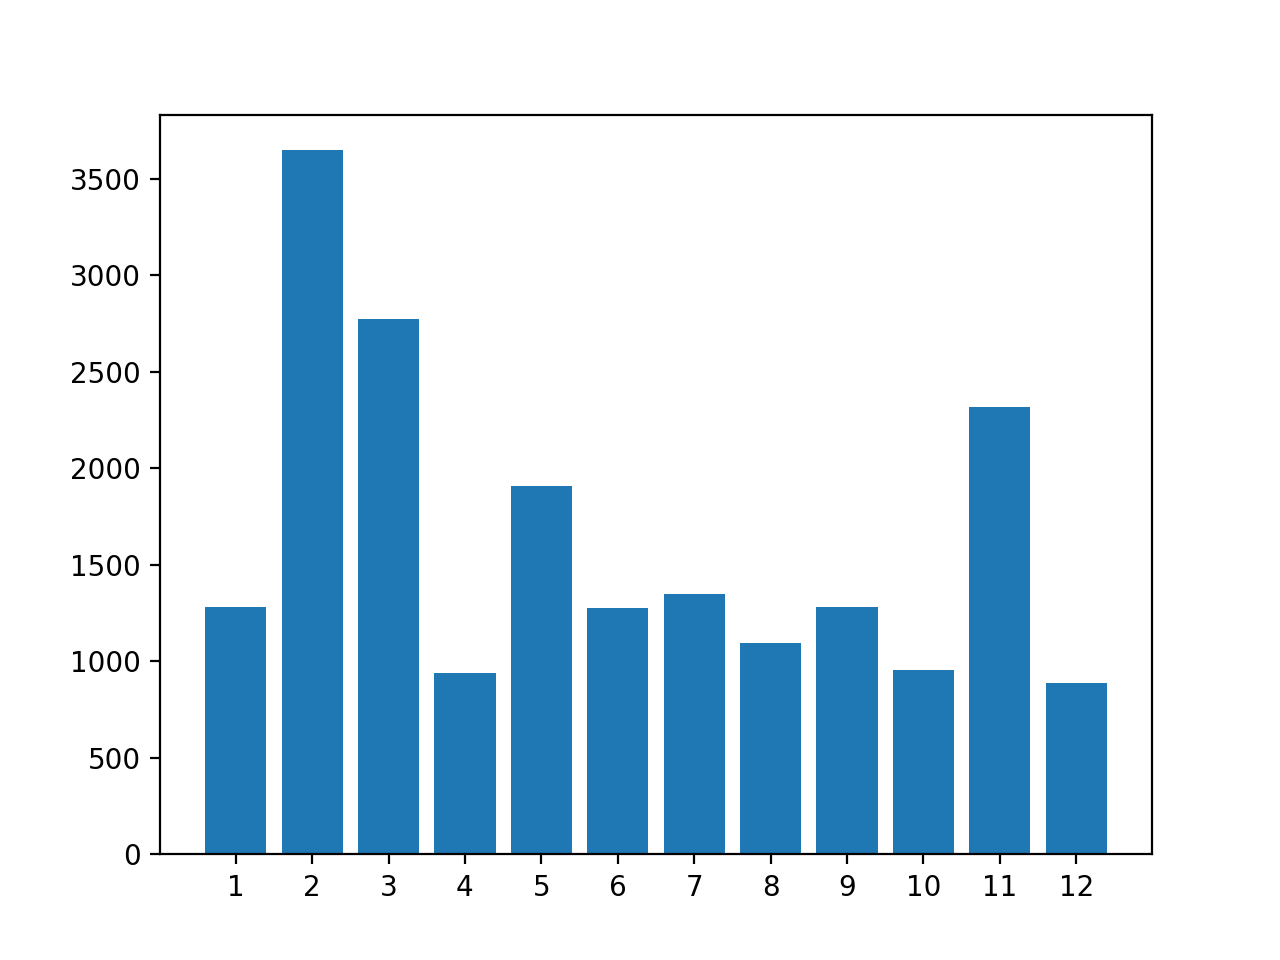

([<matplotlib.axis.XTick at 0x1a331b9438>,
 <a list of 12 Text xticklabel objects>)

In [74]:
labels = gmm.predict(em_gr_plus_raw)
population = []

for i in range(12):
    population.append(np.sum(labels==i))

population = np.array(population)

np.shape(population)

ind = np.arange(1, 13)
plt.bar(ind, population)
plt.xticks(ind)

<IPython.core.display.Javascript object>


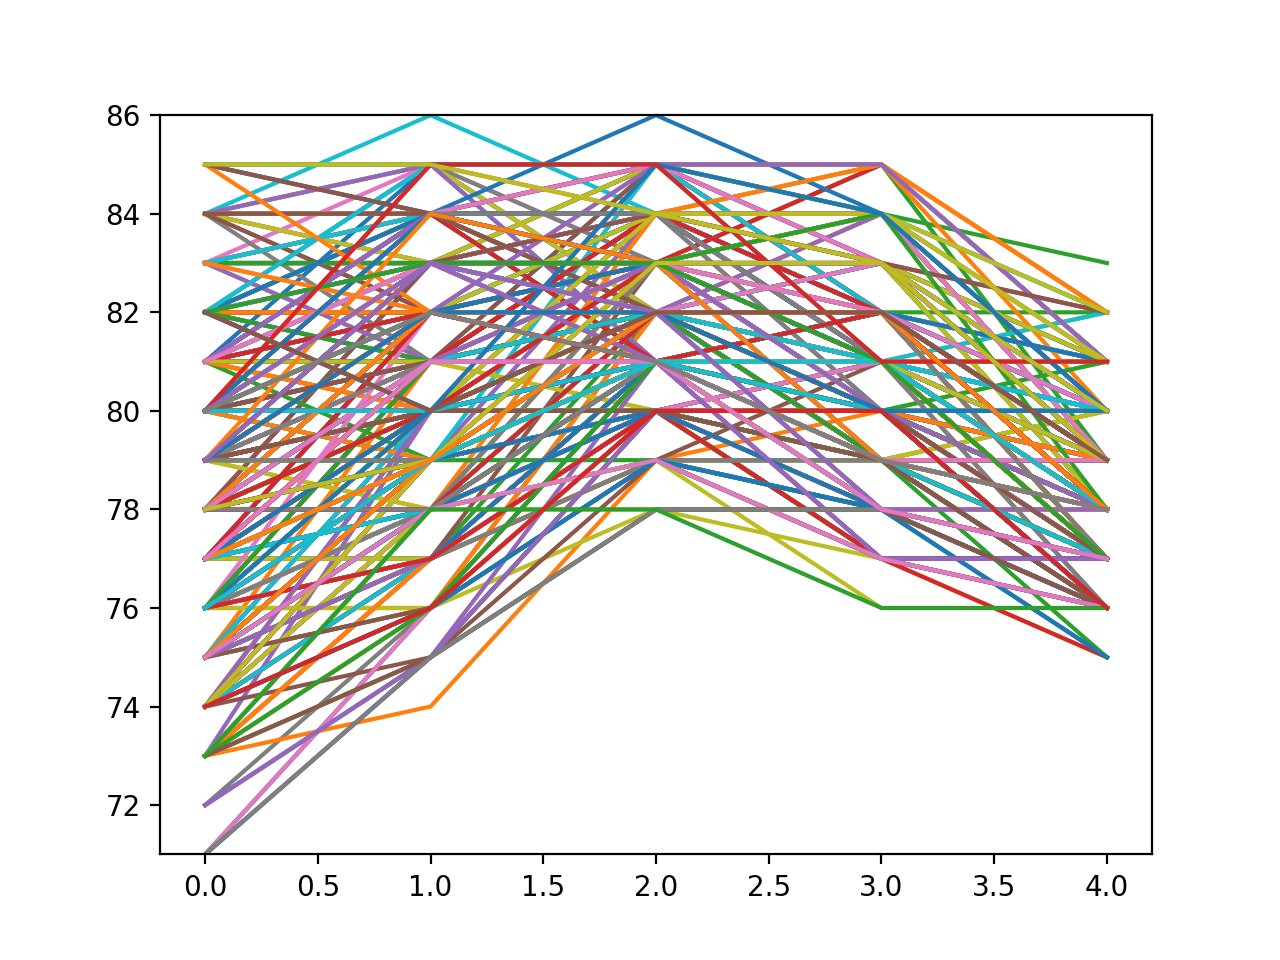

(71, 86)

In [75]:
for i in np.where(labels==11)[0][:]:
    plt.plot(em_set[i])
    
plt.ylim(71,86)

## EM Clustering with 30 groups

In [76]:
n_components_30 = 30

cv_type = 'full'
gmm_30 = mixture.GaussianMixture(n_components=n_components_30,
                                      covariance_type=cv_type)
gmm_30.fit(em_gr_plus_raw)
gmm_30.bic(em_gr_plus_raw)

230205.37456540368

<IPython.core.display.Javascript object>


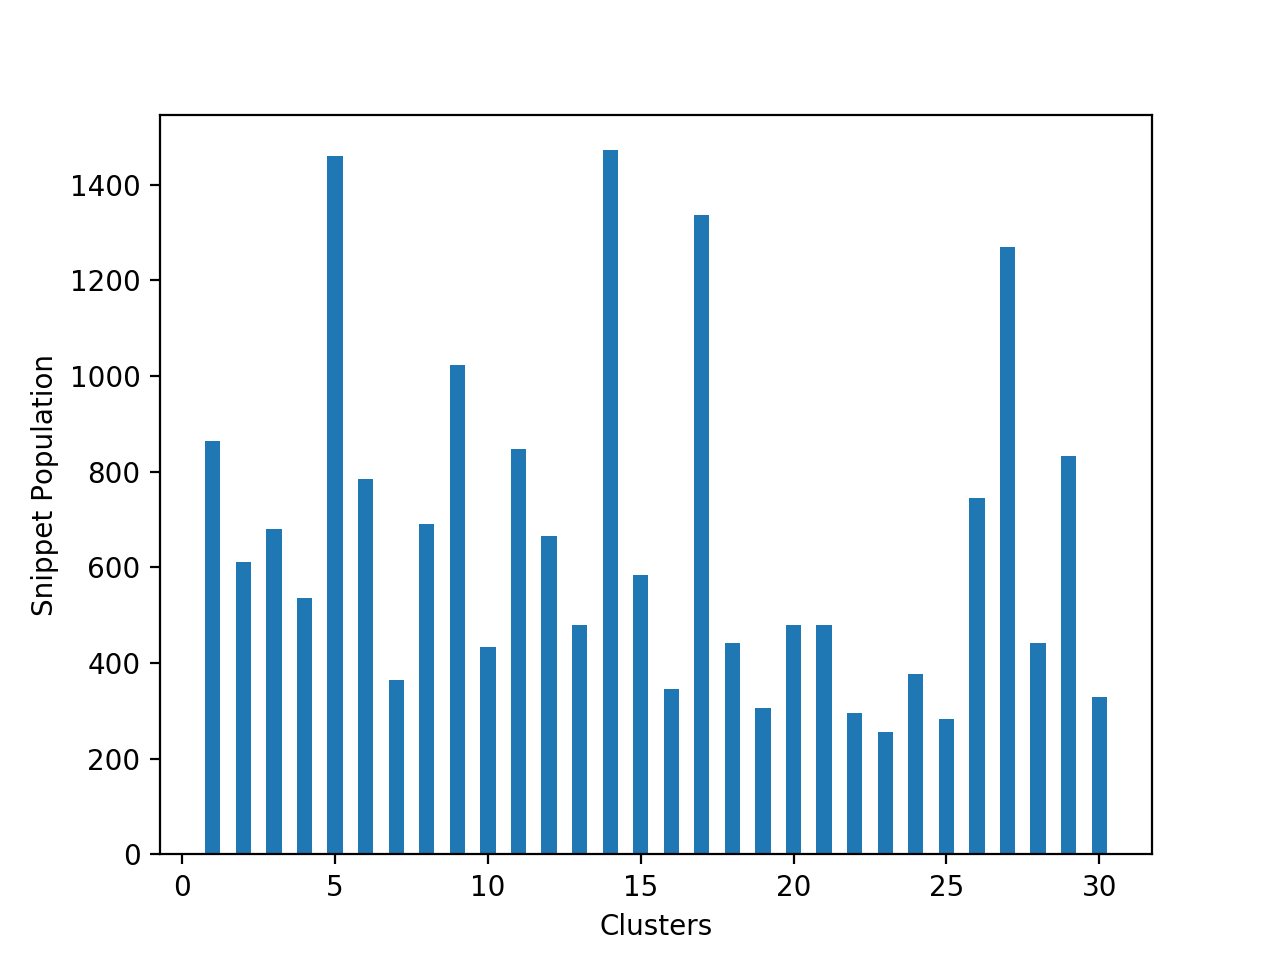

Text(0.5, 0, 'Clusters')

In [92]:
labels = gmm_30.predict(em_gr_plus_raw)
population = []

for i in range(30):
    population.append(np.sum(labels==i))

population = np.array(population)

np.shape(population)

ind = np.arange(1, 31)
plt.bar(ind, population, 0.50)
plt.xticks()
plt.ylabel("Snippet Population")
plt.xlabel("Clusters")

<IPython.core.display.Javascript object>


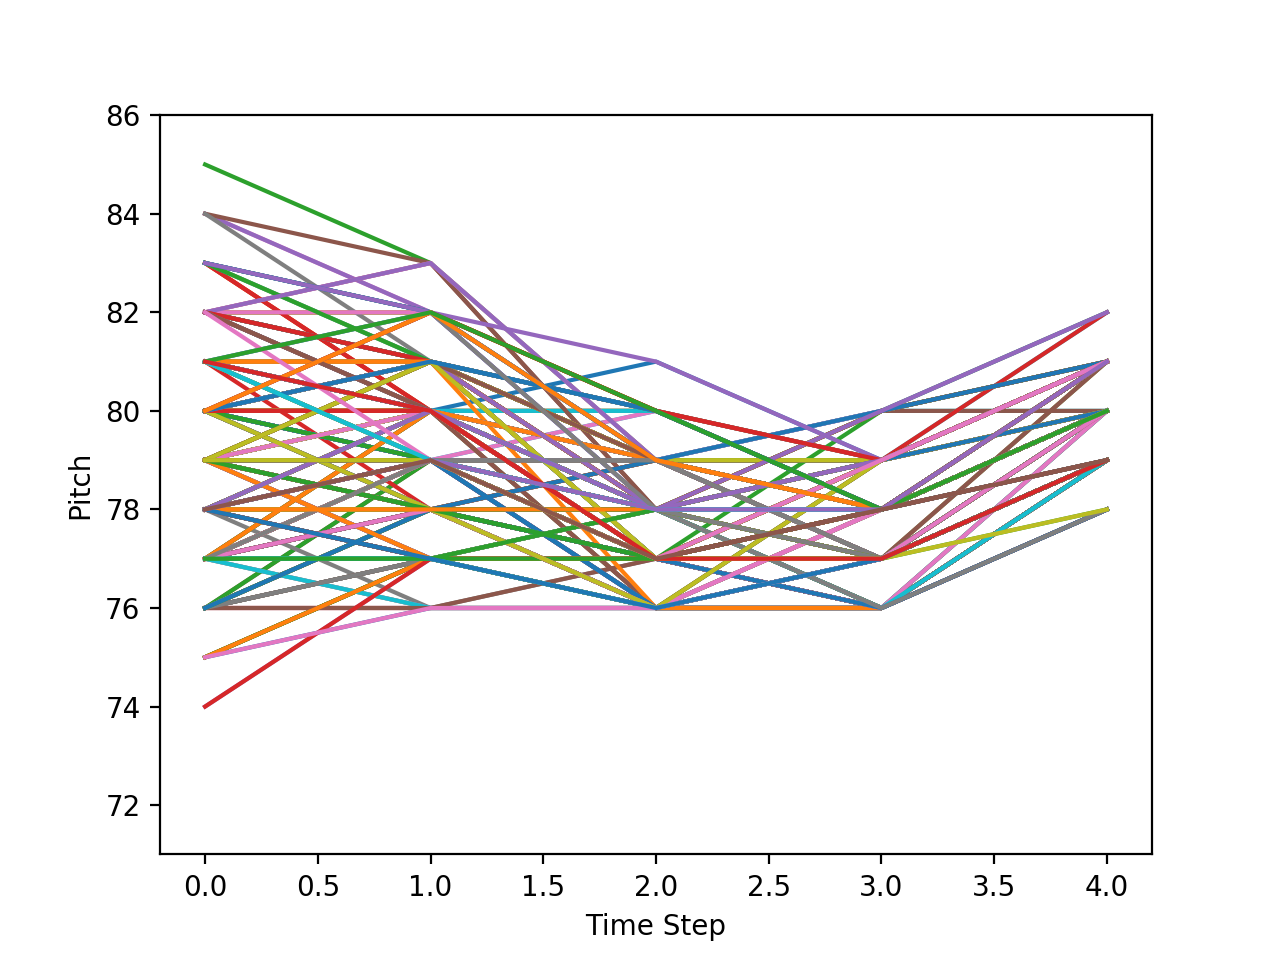

Text(0, 0.5, 'Pitch')

In [85]:
for i in np.where(labels==11)[0][:]:
    plt.plot(em_set[i])
    
plt.ylim(71,86)

plt.xlabel("Time Step")
plt.ylabel("Pitch")

<IPython.core.display.Javascript object>


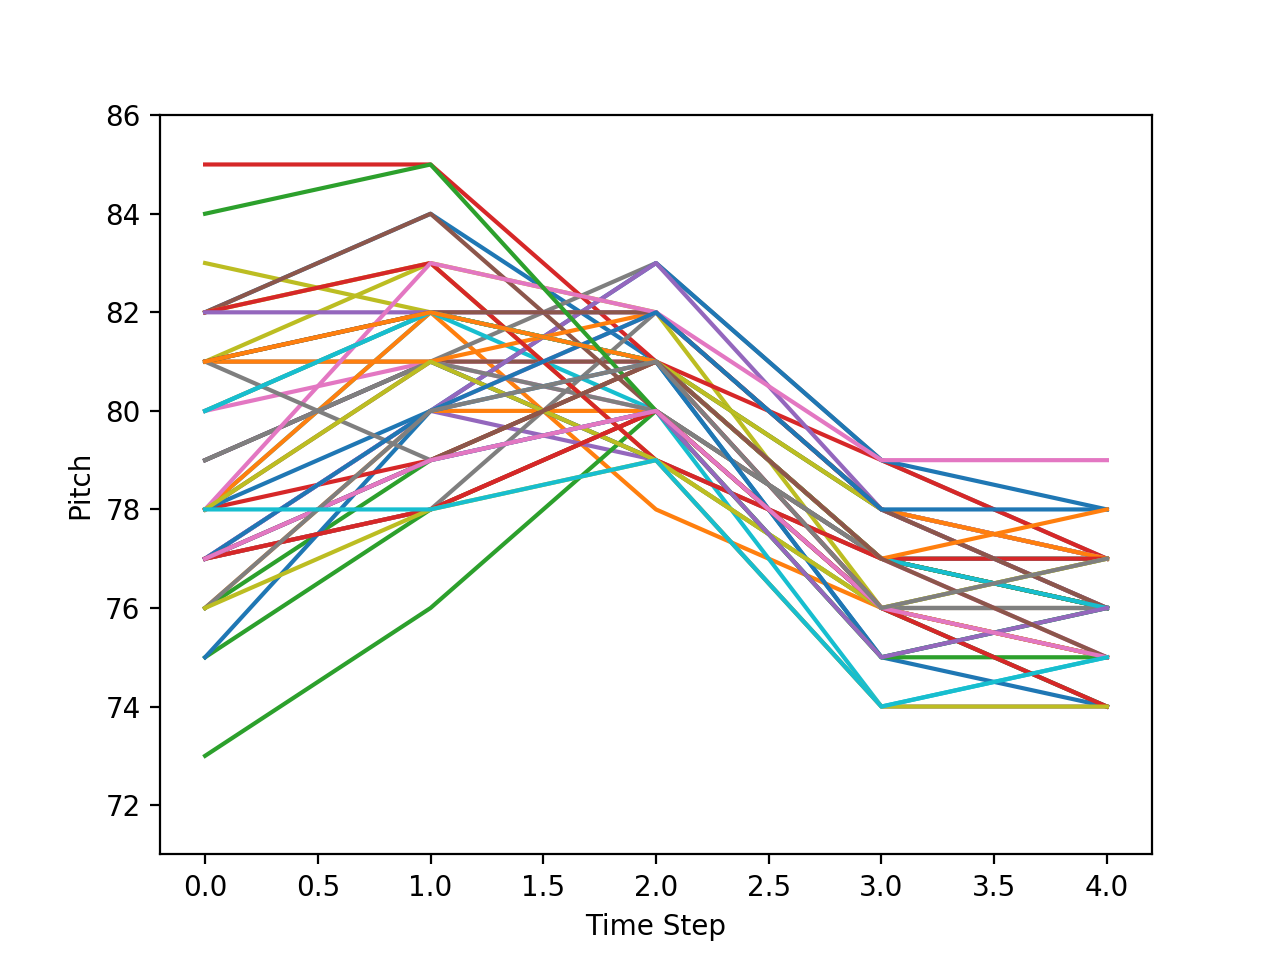

Text(0, 0.5, 'Pitch')

In [86]:
for i in np.where(labels==6)[0][0:50]:
    plt.plot(em_set[i])
    
plt.ylim(71,86)
plt.xlabel("Time Step")
plt.ylabel("Pitch")

<IPython.core.display.Javascript object>


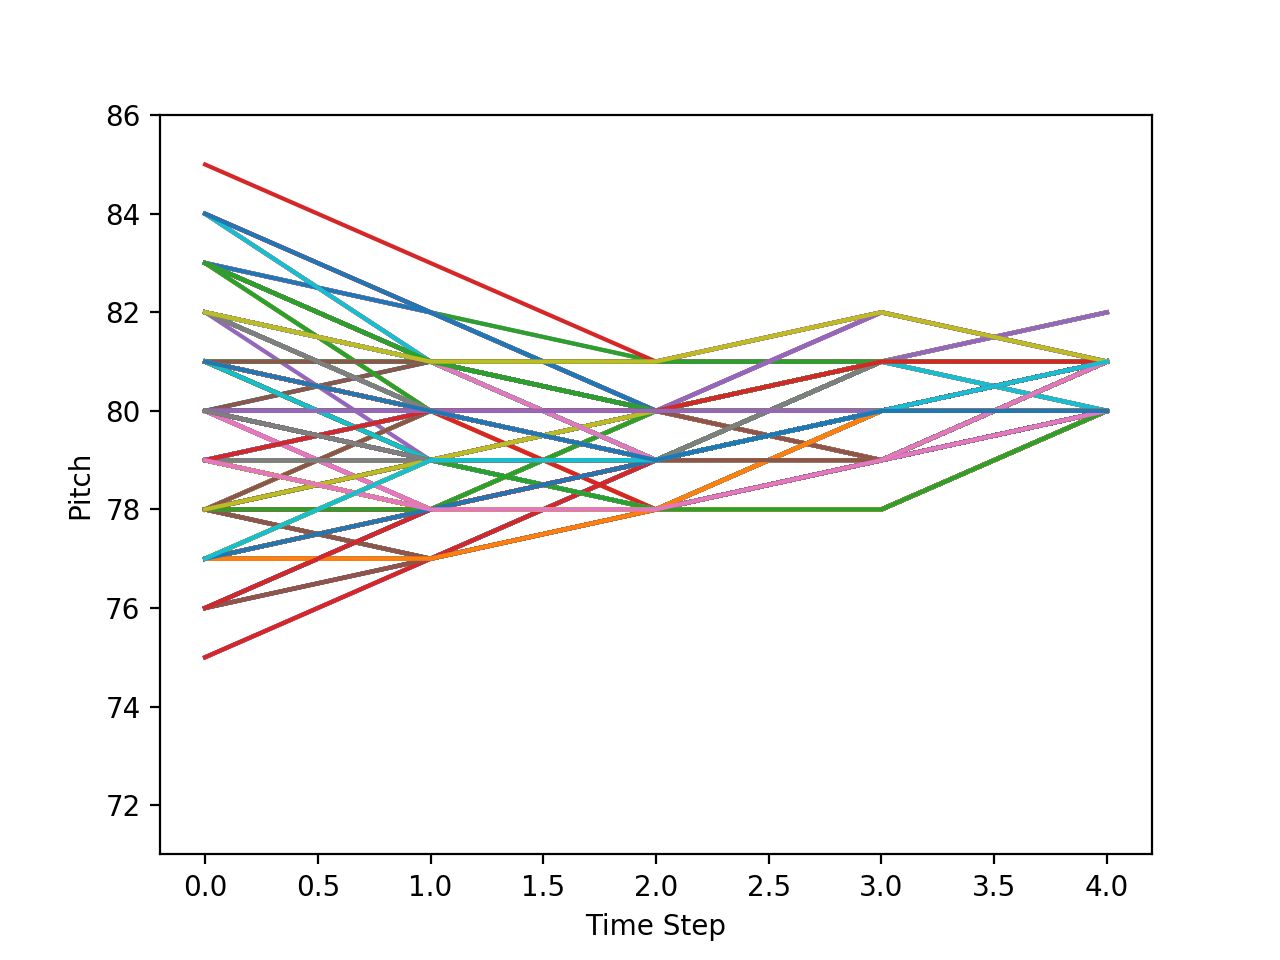

Text(0, 0.5, 'Pitch')

In [87]:
for i in np.where(labels==4)[0][:]:
    plt.plot(em_set[i])
    
plt.ylim(71,86)
plt.xlabel("Time Step")
plt.ylabel("Pitch")